In [863]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,roc_auc_score,roc_curve,mean_absolute_error,mean_squared_error 
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [864]:
df = pd.read_csv('insurance.csv')

#### https://www.kaggle.com/mirichoi0218/insurance ### 

In [865]:
df.head(20000)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [866]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [867]:
print('Dimensions: {} Rows and {} Columns '.format(df.shape[0], df.shape[1]))

Dimensions: 1338 Rows and 7 Columns 


In [868]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data analysis

In [869]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [870]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [871]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

### Visulizations

Text(0.5, 1.0, 'Age vs Charges')

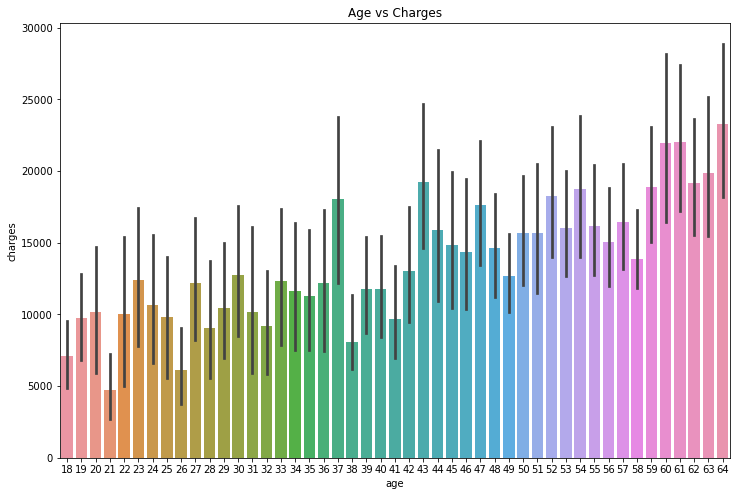

In [872]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = df)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

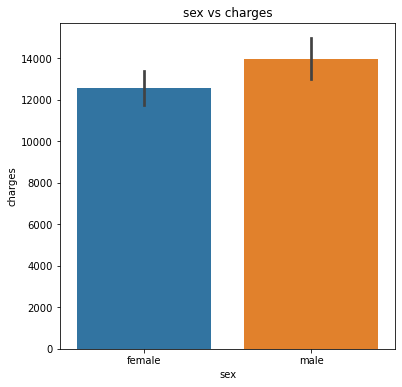

In [873]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = df)

plt.title('sex vs charges')

Text(0.5, 1.0, 'smoker vs charges')

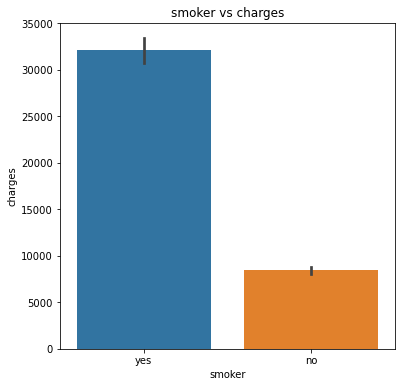

In [874]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = df)

plt.title('smoker vs charges')

Text(0.5, 1.0, 'region vs charges')

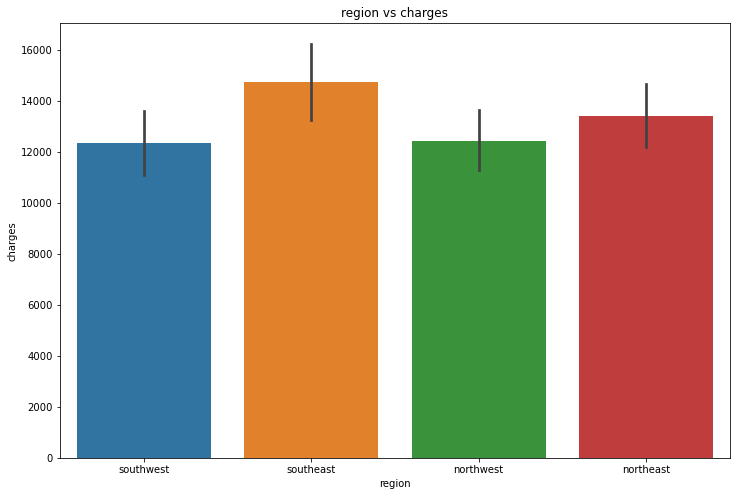

In [875]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = df)

plt.title('region vs charges')

###### Correlation Plot

<AxesSubplot:>

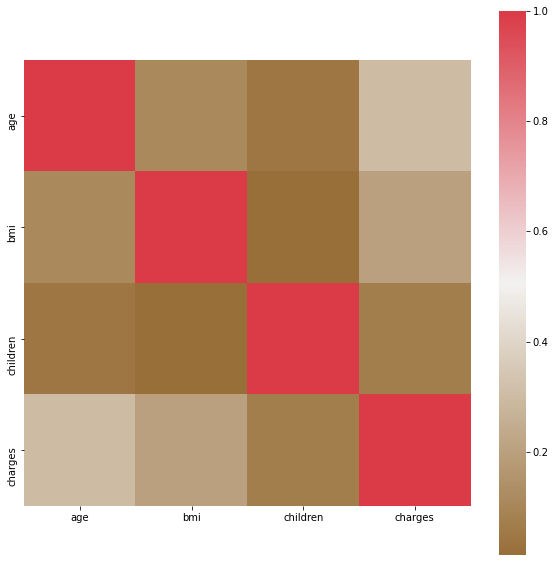

In [876]:
# plotting the correlation plot for the dataset

f, ax = plt.subplots(figsize = (10, 10))

corr = df.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

## Data Preprocessing

In [877]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [878]:
df = df.drop('region', axis=1)

In [879]:
print(df.shape)
df.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [880]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['age'] = le.fit_transform(df['age'])

In [881]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [882]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [883]:
X = df.drop(columns=['charges'])
y = df['charges']

In [884]:
print(X.shape)
X.sample(5)

(1338, 5)


,age,sex,bmi,children,smoker
709,18,0,27.740,0,0
770,43,1,36.100,3,0
855,2,0,29.600,0,0
1301,44,1,30.875,3,1
727,11,0,21.755,1,1


### Splitting the dataset into Trainning and Test set

In [885]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1)

In [886]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [887]:
columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0])],
                                      remainder='passthrough')

# Linear Regression

In [888]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from math import sqrt
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)
y_pred = lrmodel.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  35699244.58251515
RMSE:  5974.884482775809
R2 : 0.7608581750738531


# SVM

In [889]:
from sklearn.svm import SVR
svrmodel = SVR()
svrmodel.fit(X_train, y_train)
y_pred = svrmodel.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  166589638.48453304
RMSE:  12906.960853916504
R2 : -0.11594938847783132


# Decision Tree


In [890]:
from sklearn.tree import DecisionTreeRegressor
dtrmodel = DecisionTreeRegressor()
dtrmodel.fit(X_train, y_train)
y_pred = dtrmodel.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  41748842.83561668
RMSE:  6461.334446971205
R2 : 0.7203331728438254


# Random Forest 

In [891]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)
rfrmodel.fit(X_train, y_train)
y_pred = rfrmodel.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  18967610.684053656
RMSE:  4355.182049473208
R2 : 0.8729399154934808


#### Random Forest Model score is best with R2 score as 0.87

# Classification SVM

In [892]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svrmodel = SVR()
svrmodel.fit(X_train, y_train)
y_pred = svrmodel.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  166589638.48453304
RMSE:  12906.960853916504
R2 : -0.11594938847783132


# Stochastic Gradient Descent

In [893]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Ridge Regression

In [897]:
from sklearn.linear_model import Ridge
import numpy as np

In [898]:
rgrmodel = Ridge()
rgrmodel.fit(X_train, y_train)
y_pred = rgrmodel.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  35716280.19146627
RMSE:  5976.309914275386
R2 : 0.7607440570676895


## Lasso Regression

In [899]:
from sklearn.linear_model import Lasso

In [900]:
lsrmodel = Lasso()
lsrmodel.fit(X_train, y_train)
y_pred = lsrmodel.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)
RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  35699682.31730114
RMSE:  5974.921113897751
R2 : 0.7608552427794368


## Polynomial Regression

In [901]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [902]:
plrmodel = PolynomialFeatures(degree=3)
plrmodel.fit(X_train, y_train)
plrmodel = PolynomialFeatures(degree=3)

X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))

0.845778033636233
